In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, RNN, Dense, Input
from tensorflow.keras.models import Model

<!DOCTYPE html>
<html>

<body>

<h1><center>Recurrent attention unit: A new gated recurrent unit for long-term memory of important parts in sequential data</h1> 

</body>
</html>

[Link to the paper](https://www.sciencedirect.com/science/article/abs/pii/S0925231222013339?fbclid=IwY2xjawItfcJleHRuA2FlbQIxMAABHV2WDR6d-oHl6Z7mg9Hzw__Nzccrdem3wU63LHUWRUFaoks1ad79cWqJdQ_aem_QFMGZgFEYPznQPnCbUKUwA)

## Introduction


Recurrent neural networks (RNNs) are a widely used framework in the area of deep learning for sequential data processing. However, traditional RNNs struggle with some challenges such as vanishing gradients, making it difficult to capture long-term dependencies. Gated Recurrent Units (GRUs) were introduced to address this issue, reducing computational complexity compared to Long Short-Term Memory (LSTM) networks. 

In human perception, limited cognitive resources necessitate focusing on particular parts of the visual field before processing information in detail. Similarly, learning models should allocate attention to important parts of the input rather than treating all elements equally. Although GRUs are a successful variant of RNNs, they still struggle to distinguish important information from irrelevant data, and learning from long sequences seems to be very difficult.

To address these issues, the authors propose the Recurrent Attention Unit (RAU), which integrates an attention mechanism directly into the GRU cell. This enhancement allows the model to focus on significant information within sequences, improving memory retention and mitigating the limitations of traditional GRUs.

## What Problems Are Solved?

**The RAU Model: Addressing Limitations of Traditional GRUs**

**1. Lack of Selective Attention:**
- GRUs process all sequential information equally, making it difficult to focus on key elements.
- RAU introduces an attention gate that assigns weights to important features, allowing selective memory retention.

**2. Difficulty in Learning Long Sequences:**
- GRUs struggle with very long dependencies due to limited memory capacity.
- RAU improves long-term memory handling by adaptively filtering out irrelevant data while retaining critical information.

**Key Features of RAU**
- **Integration of Attention Mechanism:**  
  The attention gate enhances the network’s ability to focus on essential parts of the sequence while ignoring less significant information.
- **Improved Gradient Flow:**  
  By better handling long-term dependencies, RAU reduces gradient vanishing and exploding issues in recurrent networks.
- **Versatility Across Applications:**  
  RAU demonstrates superior performance across various tasks, including image recognition, sentiment analysis, and language modeling.


## **Recurrent Attention Unit (RAU) - Key Mathematical Formulas**

RAU improves the traditional GRU by integrating an **attention mechanism**, which helps the model focus on important parts of sequential data.

---

## **1. Attention Weight Calculation**
RAU computes an **attention score** for each time step to determine which information is important. The attention weight $a_t$ is calculated as:

$$
a_t = \frac{\exp(c_t)}{\sum_{i} \exp(c_i)}
$$

where  

$$
c_t = W_c [x_t, h_{t-1}] + b_c
$$

### **Explanation:**  
- $c_t$ is the attention score based on the current input $x_t$ and the previous hidden state $h_{t-1}$.
- $W_c$ and $b_c$ are learnable parameters.
- The **softmax function** ensures that attention weights sum to 1, making the model focus more on important information.

---

## **2. Final Hidden State Update in RAU**  
RAU modifies the GRU update formula by adding an **attention-weighted hidden state**:

$$
h_t = z_t \odot h_{t-1} + (1 - z_t) \odot \tilde{h}_t + \hat{h}_t
$$

where:  
- $z_t$ is the **update gate** that decides how much past information to retain.  
- $\tilde{h}_t$ is the **candidate hidden state** (new memory).  
- $\hat{h}_t = a_t \odot \text{ReLU}(W_h [x_t, h_{t-1}] + b_h)$ is the **attention-weighted hidden state**.

### **Explanation:**  
- This formula allows RAU to **prioritize important information** while processing sequences.  
- The **attention mechanism** ensures that significant details are retained better than in a traditional GRU.  
- It helps RAU **capture long-term dependencies** more effectively. 


## Experiments & Results  

To evaluate the effectiveness of the **Recurrent Attention Unit (RAU)**, the authors conducted experiments on six different tasks, comparing RAU with traditional **Long Short-Term Memory (LSTM)** and **Gated Recurrent Unit (GRU)** networks. These experiments test the ability of RAU to handle **long-term dependencies**, **focus on important information**, and **improve performance in sequential data tasks**.  

The results are summarized in the table below:  

| **Task**                                   | **Metric**                 | **LSTM**  | **GRU**   | **RAU** (Proposed) |
|--------------------------------------------|----------------------------|----------|----------|------------------|
| **Adding Problem**                         | Mean Squared Error (MSE)   | High     | Moderate | **Lowest**       |
| **Pixel-by-Pixel MNIST Recognition**       | Accuracy (%)               | 86.72%   | 85.16%   | **98.45%**       |
| **Row-Wise MNIST Recognition**             | Accuracy (%)               | 98.54%   | 98.55%   | **98.87%**       |
| **Fashion-MNIST Classification**           | Accuracy (%)               | 87.89%   | 88.45%   | **89.70%**       |
| **Sentiment Analysis (IMDB Reviews)**      | Accuracy (%)               | 76.59%   | 75.70%   | **76.72%**       |
| **Word-Level Language Modeling (PTB Corpus)** | Perplexity (Lower is Better) | 115.06   | 114.96   | **110.72**       |

**Key Observations:**  
- **RAU outperforms both LSTM and GRU** in all tasks, demonstrating its ability to retain important information over long sequences.  
- In **image classification tasks**, RAU achieves significantly **higher accuracy** (98.45% in pixel-wise MNIST and 98.87% in row-wise MNIST).  
- For **natural language processing tasks** (IMDB Sentiment Analysis and PTB Language Modeling), RAU achieves **better classification accuracy and lower perplexity**, making it more effective for text-based applications.  
- The **Adding Problem** experiment confirms RAU’s **superior ability to model long-term dependencies**, which is crucial for sequential data processing.  

The results highlight RAU’s ability to **capture long-term dependencies, focus on crucial elements, and enhance sequential data processing** across different applications.  

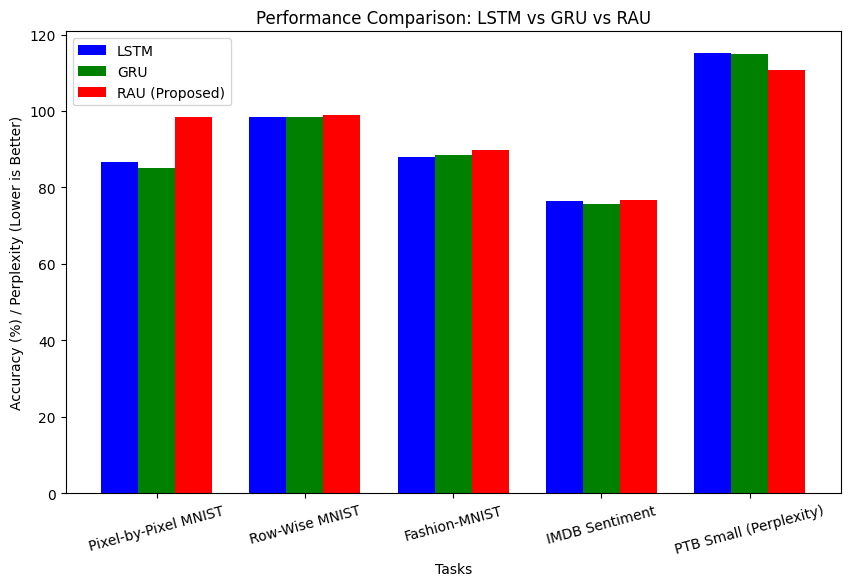

In [4]:
tasks = [
    "Pixel-by-Pixel MNIST", 
    "Row-Wise MNIST", 
    "Fashion-MNIST", 
    "IMDB Sentiment", 
    "PTB Small (Perplexity)"
]

lstm_acc = [86.72, 98.54, 87.89, 76.59, 115.06]
gru_acc = [85.16, 98.55, 88.45, 75.70, 114.96]
rau_acc = [98.45, 98.87, 89.70, 76.72, 110.72]

x = np.arange(len(tasks))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, lstm_acc, width, label="LSTM", color="blue")
bars2 = ax.bar(x, gru_acc, width, label="GRU", color="green")
bars3 = ax.bar(x + width, rau_acc, width, label="RAU (Proposed)", color="red")

ax.set_xlabel("Tasks")
ax.set_ylabel("Accuracy (%) / Perplexity (Lower is Better)")
ax.set_title("Performance Comparison: LSTM vs GRU vs RAU")
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=15)
ax.legend()

plt.show()

## Conclusion
The Recurrent Attention Unit (RAU) is an innovative improvement over traditional GRUs, incorporating an attention mechanism directly into the recurrent unit. By selectively focusing on important information, RAU enhances long-term memory handling, gradient stability, and overall model performance. Extensive experiments demonstrate its effectiveness across diverse tasks in image classification, sentiment analysis, and language modeling.

The proposed model serves as a viable alternative to GRU and LSTM, offering a more efficient and robust approach to sequential data learning. Future research may focus on optimizing RAU’s structure for even better performance in complex real-world applications.

In [7]:
class RAUCell(Layer):
    def __init__(self, units, **kwargs):
        super(RAUCell, self).__init__(**kwargs)
        self.units = units
        self.state_size = self.units

    def build(self, input_shape):
        input_dim = input_shape[-1]

        self.W_z = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform", name="W_z")
        self.b_z = self.add_weight(shape=(self.units,), initializer="zeros", name="b_z")

        self.W_r = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform", name="W_r")
        self.b_r = self.add_weight(shape=(self.units,), initializer="zeros", name="b_r")

        self.W_h = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform", name="W_h")
        self.b_h = self.add_weight(shape=(self.units,), initializer="zeros", name="b_h")

        self.W_c = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform", name="W_c")
        self.b_c = self.add_weight(shape=(self.units,), initializer="zeros", name="b_c")

        super(RAUCell, self).build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        
        concat_input = tf.concat([inputs, h_prev], axis=-1)
        z_t = tf.sigmoid(tf.matmul(concat_input, self.W_z) + self.b_z)
        r_t = tf.sigmoid(tf.matmul(concat_input, self.W_r) + self.b_r)

        r_h_prev = r_t * h_prev
        concat_r_input = tf.concat([inputs, r_h_prev], axis=-1)
        h_tilde = tf.tanh(tf.matmul(concat_r_input, self.W_h) + self.b_h)

        c_t = tf.matmul(concat_input, self.W_c) + self.b_c
        a_t = tf.nn.softmax(c_t)

        h_att = a_t * tf.nn.relu(tf.matmul(concat_input, self.W_h) + self.b_h)

        h_t = z_t * h_prev + (1 - z_t) * h_tilde + h_att

        return h_t, [h_t]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 5)]           0         
                                                                 
 rnn_1 (RNN)                 (None, 32)                4864      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4897 (19.13 KB)
Trainable params: 4897 (19.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 3s 27ms/step - loss: 0.6979 - accuracy: 0.4925 - val_loss: 0.6985 - val_accuracy: 0.4650
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5100 - val_loss: 0.6940 - val_accuracy: 0.5350
Epoch 3

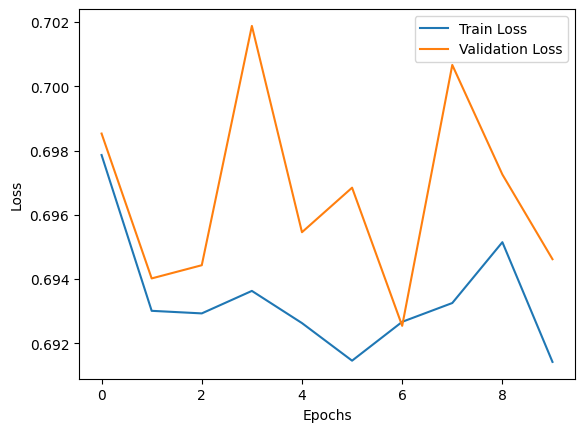

In [8]:
time_steps = 10
features = 5
samples = 1000

np.random.seed(42)
X_dummy = np.random.rand(samples, time_steps, features)
Y_dummy = np.random.randint(0, 2, size=(samples, 1))

inputs = Input(shape=(time_steps, features))
rau_layer = RNN(RAUCell(32), return_sequences=False)(inputs)
outputs = Dense(1, activation="sigmoid")(rau_layer)

model = Model(inputs, outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

history = model.fit(X_dummy, Y_dummy, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()